In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# configurations
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:.3f}")
sns.set_theme(style="darkgrid")

plt.rcParams.update({
    "axes.titlesize": 10,
    "axes.labelsize": 9,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
})

RANDOM_STATE = 42
CSV_PATH = "housing.csv"          
TARGET_COL = "median_house_value" 

In [3]:
#LOADING THE DATA

df = pd.read_csv(CSV_PATH)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230,37.880,41.000,880.000,129.000,322.000,126.000,8.325,452600.000,NEAR BAY
1,-122.220,37.860,21.000,7099.000,1106.000,2401.000,1138.000,8.301,358500.000,NEAR BAY
2,-122.240,37.850,52.000,1467.000,190.000,496.000,177.000,7.257,352100.000,NEAR BAY
3,-122.250,37.850,52.000,1274.000,235.000,558.000,219.000,5.643,341300.000,NEAR BAY
4,-122.250,37.850,52.000,1627.000,280.000,565.000,259.000,3.846,342200.000,NEAR BAY


In [5]:
df.shape

(20640, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
# separting the numerical coulmns and categorical columns

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

cat_cols = df.select_dtypes(include=["object"]).columns.tolist()


In [9]:
print(num_cols)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


In [10]:
print(cat_cols)

['ocean_proximity']


In [11]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
for col in df.columns:
    print(df[col].value_counts().head(20))

longitude
-118.310    162
-118.300    160
-118.290    148
-118.270    144
-118.320    142
-118.280    141
-118.350    140
-118.360    138
-118.190    135
-118.370    128
-118.250    128
-118.200    126
-118.140    125
-118.130    121
-118.260    121
-118.180    120
-118.340    119
-118.210    118
-118.150    116
-118.120    112
Name: count, dtype: int64
latitude
34.060    244
34.050    236
34.080    234
34.070    231
34.040    221
34.090    212
34.020    208
34.100    203
34.030    193
33.930    181
33.940    175
33.970    172
33.990    168
33.880    164
34.110    162
33.980    162
34.160    159
34.120    158
34.150    157
34.010    156
Name: count, dtype: int64
housing_median_age
52.000    1273
36.000     862
35.000     824
16.000     771
17.000     698
34.000     689
26.000     619
33.000     615
18.000     570
25.000     566
32.000     565
37.000     537
15.000     512
19.000     502
27.000     488
24.000     478
30.000     476
28.000     471
20.000     465
29.000     461
Name: coun

In [13]:
# duplicates

duplicate_mask = df.duplicated()
num_duplicates = duplicate_mask.sum()
print(num_duplicates)

0


In [14]:
df[num_cols].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.000,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.540,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.330,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.000,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.000,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.000,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.000,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.000,15.000,500001.000


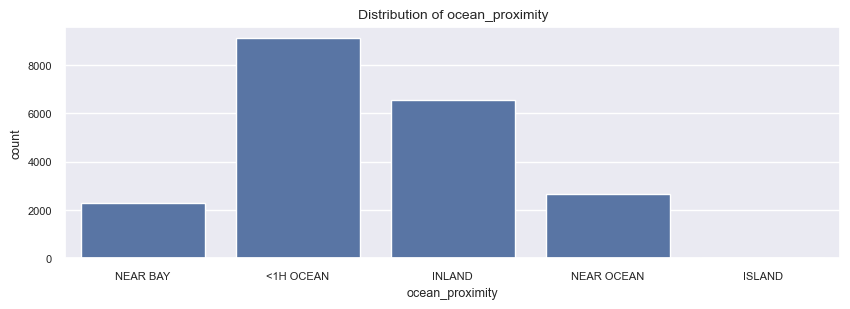

In [15]:
# data visualization

for col in cat_cols:
    plt.figure(figsize=(10,3))
    sns.countplot(x=col,data=df)
    plt.title(f"Distribution of {col}")
    plt.show

In [16]:
for col in cat_cols:
    print(df[col].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


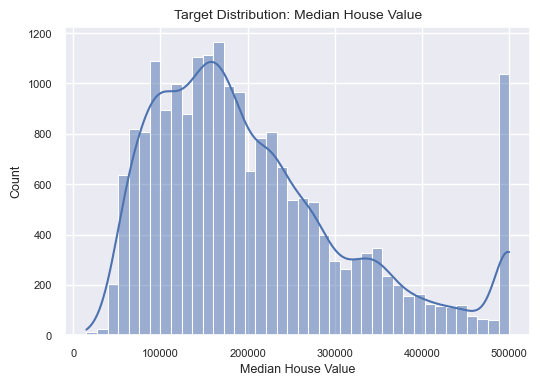

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df[TARGET_COL], bins=40, kde=True)
plt.title("Target Distribution: Median House Value")
plt.xlabel("Median House Value")
plt.show()

In [18]:
df[TARGET_COL].value_counts()

median_house_value
500001.000    965
137500.000    122
162500.000    117
112500.000    103
187500.000     93
             ... 
359200.000      1
54900.000       1
377600.000      1
81200.000       1
47000.000       1
Name: count, Length: 3842, dtype: int64

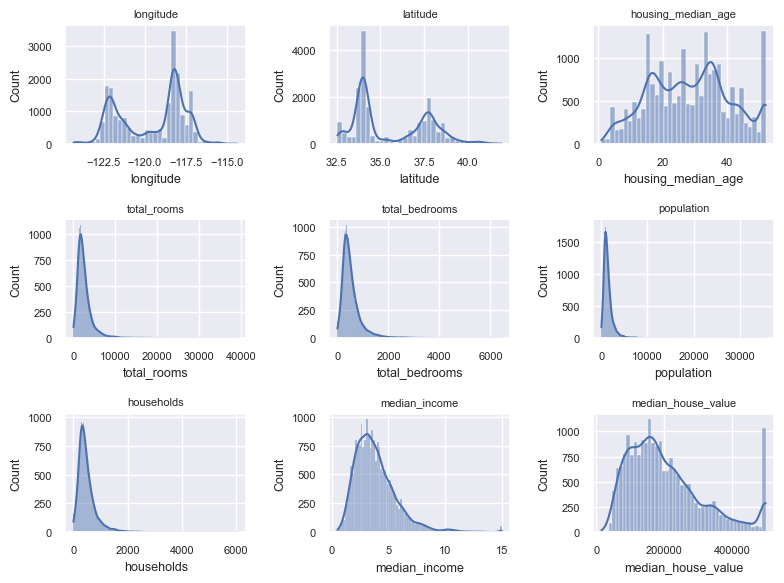

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(8, 6))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col, fontsize=8)

plt.tight_layout()
plt.show()

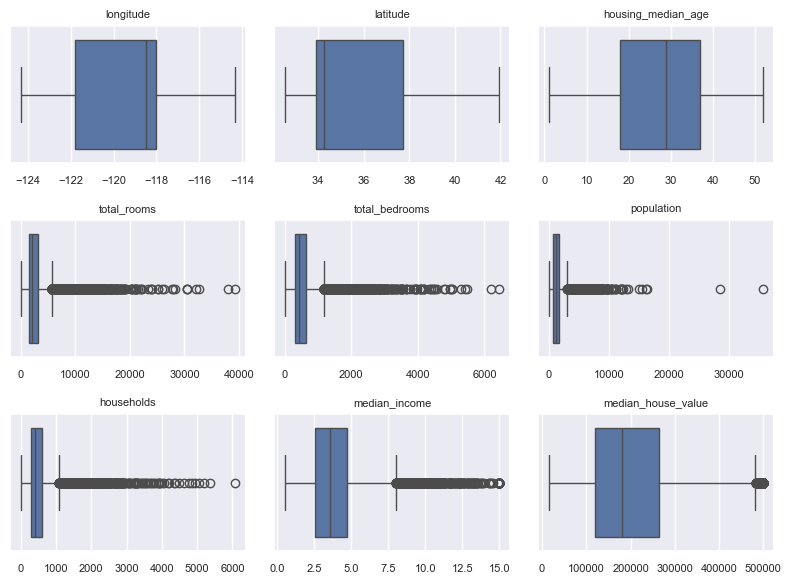

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(8, 6))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col, fontsize=8)
    axes[i].set_xlabel("")

plt.tight_layout()
plt.show()

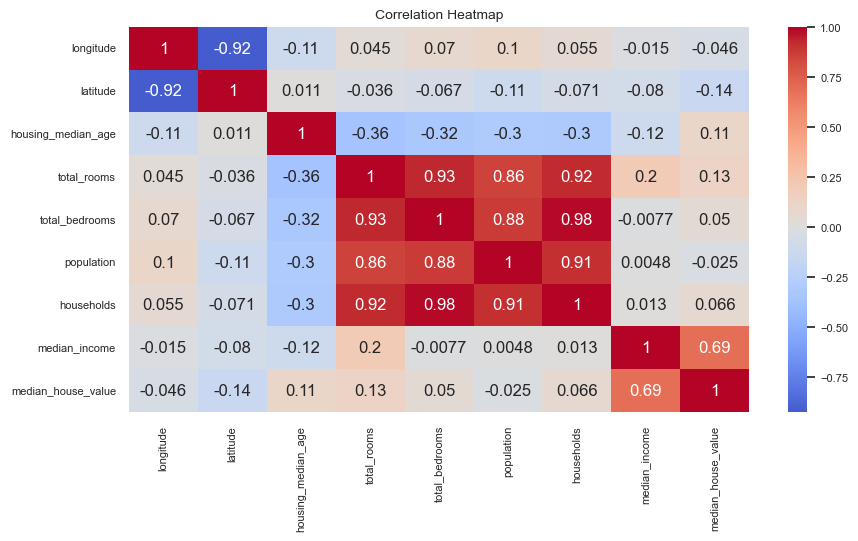

In [21]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    df[num_cols].corr(),
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Heatmap")
plt.show()

In [22]:
corr_with_target = df[num_cols].corr()[TARGET_COL].sort_values(ascending=False)
print(corr_with_target)


median_house_value    1.000
median_income         0.688
total_rooms           0.134
housing_median_age    0.106
households            0.066
total_bedrooms        0.050
population           -0.025
longitude            -0.046
latitude             -0.144
Name: median_house_value, dtype: float64


In [23]:
# TEST VALUE OF THE X AND Y

x = df.drop(columns=[TARGET_COL])

y = df[TARGET_COL]



In [24]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.230,37.880,41.000,880.000,129.000,322.000,126.000,8.325,NEAR BAY
1,-122.220,37.860,21.000,7099.000,1106.000,2401.000,1138.000,8.301,NEAR BAY
2,-122.240,37.850,52.000,1467.000,190.000,496.000,177.000,7.257,NEAR BAY
3,-122.250,37.850,52.000,1274.000,235.000,558.000,219.000,5.643,NEAR BAY
4,-122.250,37.850,52.000,1627.000,280.000,565.000,259.000,3.846,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.090,39.480,25.000,1665.000,374.000,845.000,330.000,1.560,INLAND
20636,-121.210,39.490,18.000,697.000,150.000,356.000,114.000,2.557,INLAND
20637,-121.220,39.430,17.000,2254.000,485.000,1007.000,433.000,1.700,INLAND
20638,-121.320,39.430,18.000,1860.000,409.000,741.000,349.000,1.867,INLAND


In [25]:
y

0       452600.000
1       358500.000
2       352100.000
3       341300.000
4       342200.000
           ...    
20635    78100.000
20636    77100.000
20637    92300.000
20638    84700.000
20639    89400.000
Name: median_house_value, Length: 20640, dtype: float64

In [26]:
# train the split 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=RANDOM_STATE
)

In [27]:
print(x_train)
print(y_train)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196   -117.030    32.710              33.000     3126.000         627.000   
8267    -118.160    33.770              49.000     3382.000         787.000   
17445   -120.480    34.660               4.000     1897.000         331.000   
14265   -117.110    32.690              36.000     1421.000         367.000   
2271    -119.800    36.780              43.000     2382.000         431.000   
...          ...       ...                 ...          ...             ...   
11284   -117.960    33.780              35.000     1330.000         201.000   
11964   -117.430    34.020              33.000     3084.000         570.000   
5390    -118.380    34.030              36.000     2101.000         569.000   
860     -121.960    37.580              15.000     3575.000         597.000   
15795   -122.420    37.770              52.000     4226.000        1315.000   

       population  households  median_income ocean_

In [29]:
#pre processing pipeline

numerical_features = x_train.select_dtypes(include=[np.number]).columns.tolist()

print(numerical_features)

categorical_features = x_train.select_dtypes(exclude=[np.number]).columns.tolist()

print(categorical_features)


['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['ocean_proximity']


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

from sklearn.metrics import (
    mean_absolute_error,
    root_mean_squared_error,
    r2_score
)

numerical_transform = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

categorical_features = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


NameError: name 'numerical_transformer' is not defined